In [1]:
import os
import yaml
import pandas as pd
from collections import defaultdict # Avoids KeyErrors when accessing non-existent keys and automatically initializes values for missing keys
from collections.abc import Mapping  # Ensure dictionary flattening works
import glob

In [3]:
""" # Combine Data: Merge all genre-wise CSVs into a single DataFrame. """

os.chdir(r"C:\Users\v-dhramaraj\Desktop\Python\Projects\Assignment2_StockAnalysis\Assignment2_StockAnalysis\Nifty50_data") # Define Path to store the csv file
# print(os.getcwd())

# Specify the path where your CSV files are located
csv_files = glob.glob("*.csv")

# Read and merge all CSV files into a single DataFrame
Nifty50_AllData_df = pd.DataFrame()
Nifty50_AllData_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
# Nifty50_AllData_df.to_csv(r"C:\Users\v-dhramaraj\Desktop\Python\Projects\Assignment2_StockAnalysis\Assignment2_StockAnalysis\Nifty50_AllData.csv", index=False) # Commenting line to prevent duplication

# Display the merged DataFrame
print(Nifty50_AllData_df)

                                           Source Folder    Ticker    close  \
0      C:\Users\v-dhramaraj\Desktop\Python\Projects\A...  ADANIENT  2387.25   
1      C:\Users\v-dhramaraj\Desktop\Python\Projects\A...  ADANIENT  2464.95   
2      C:\Users\v-dhramaraj\Desktop\Python\Projects\A...  ADANIENT  2466.35   
3      C:\Users\v-dhramaraj\Desktop\Python\Projects\A...  ADANIENT  2478.10   
4      C:\Users\v-dhramaraj\Desktop\Python\Projects\A...  ADANIENT  2442.60   
...                                                  ...       ...      ...   
14195  C:\Users\v-dhramaraj\Desktop\Python\Projects\A...     WIPRO   566.70   
14196  C:\Users\v-dhramaraj\Desktop\Python\Projects\A...     WIPRO   552.85   
14197  C:\Users\v-dhramaraj\Desktop\Python\Projects\A...     WIPRO   562.00   
14198  C:\Users\v-dhramaraj\Desktop\Python\Projects\A...     WIPRO   557.15   
14199  C:\Users\v-dhramaraj\Desktop\Python\Projects\A...     WIPRO   571.65   

                      date     high      low    mon

In [4]:
# Drop rows with null values
Nifty50_AllData_df = Nifty50_AllData_df.dropna()

# Remove duplicate rows
Nifty50_AllData_df = Nifty50_AllData_df.drop_duplicates()

# Convert to datetime and extract only the date
Nifty50_AllData_df['date'] = pd.to_datetime(Nifty50_AllData_df['date']).dt.date

# Delete 'Source Folder' column
if "Source Folder" in Nifty50_AllData_df.columns:
    Nifty50_AllData_df = Nifty50_AllData_df.drop(columns=["Source Folder"])

# Display summary after cleaning
print("Data cleaned successfully!")
print(Nifty50_AllData_df.info())  # Show DataFrame structure after cleaning
print(Nifty50_AllData_df)

Data cleaned successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14200 entries, 0 to 14199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  14200 non-null  object 
 1   close   14200 non-null  float64
 2   date    14200 non-null  object 
 3   high    14200 non-null  float64
 4   low     14200 non-null  float64
 5   month   14200 non-null  object 
 6   open    14200 non-null  float64
 7   volume  14200 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 887.6+ KB
None
         Ticker    close        date     high      low    month     open  \
0      ADANIENT  2387.25  2023-10-03  2424.90  2372.00  2023-10  2418.00   
1      ADANIENT  2464.95  2023-10-04  2502.75  2392.25  2023-10  2402.20   
2      ADANIENT  2466.35  2023-10-05  2486.50  2446.40  2023-10  2477.95   
3      ADANIENT  2478.10  2023-10-06  2514.95  2466.05  2023-10  2466.35   
4      ADANIENT  2442.60  2023-10-09  2459.70 

In [5]:
import mysql.connector
import sqlalchemy
from sqlalchemy import create_engine

In [6]:
# Connect to MySQL Workbench and create database if it doesn't exist

conn = mysql.connector.connect(
    host="localhost",  # Change this if connecting to a remote server
    user="dhiviya",  # Replace with your MySQL username
    password="MySQL@25",  # Replace with your MySQL password
)

# Create a cursor object
cursor = conn.cursor()
cursor.execute("CREATE DATABASE IF NOT EXISTS Nifty50") # Create the database if it doesn't exist
conn.commit() # Commit changes
# Close the initial connection
cursor.close()
conn.close()

# Connect to the new database created //Nifty50
conn = mysql.connector.connect(
    host="localhost",
    user="dhiviya",
    password="MySQL@25",
    database="Nifty50"
)
cursor = conn.cursor()
print("Successfully connected to the 'Nifty50' database!")

# Create a table if it doesn't exist
create_table= """
    CREATE TABLE IF NOT EXISTS Nifty50_Table (
        id INT AUTO_INCREMENT PRIMARY KEY,
        Ticker VARCHAR(255),
        close VARCHAR(255),
        date VARCHAR(255),
        high VARCHAR(255),
        low VARCHAR(255),
        month VARCHAR(255),
        open VARCHAR(255),
        volume VARCHAR(255)
    )
"""
cursor.execute(create_table)
print("Successfully created table 'Nifty50_Table'!")

# # Insert data into the table

# Nifty50_AllData_df = Nifty50_AllData_df.infer_objects(copy=False)  # Ensures proper dtype inference
# Nifty50_AllData_df= Nifty50_AllData_df.fillna(0)  # Replace NaN with 0 for numeric columns
# data_to_insert = Nifty50_AllData_df.values.tolist() # Convert DataFrame to a list of tuples

# # insert_query = "INSERT INTO Nifty50_Table(Ticker, close, date, high, low, month, open, volume) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
# # cursor.executemany(insert_query, data_to_insert)
# conn.commit()

# Always remember to close the connection when done
cursor.close()
conn.close()

Successfully connected to the 'Nifty50' database!
Successfully created table 'Nifty50_Table'!


In [7]:
Nifty50_df = Nifty50_AllData_df.copy() # Create a copy of DF for data manupulations
print(Nifty50_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14200 entries, 0 to 14199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  14200 non-null  object 
 1   close   14200 non-null  float64
 2   date    14200 non-null  object 
 3   high    14200 non-null  float64
 4   low     14200 non-null  float64
 5   month   14200 non-null  object 
 6   open    14200 non-null  float64
 7   volume  14200 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 887.6+ KB
None


In [8]:
""" -------------- Data Analysis and Visualization --------------------
Metrics:
Calculate daily returns for each stock: (Close Price - Previous Close Price) / Previous Close Price.
Compute the standard deviation of daily returns for each stock to measure volatility.
Plot a bar chart showing the volatility of the top 10 most volatile stocks over the year.     

-------------- Python DataFrame for Key Metrics: -------------------
Top 10 Green Stocks: Sort the stocks based on their yearly return and select the top 10.
Top 10 Loss Stocks: Sort the stocks based on their yearly return and select the bottom 10.
Market Summary:
Calculate the overall number of green vs. red stocks.
Calculate the average price across all stocks.
Calculate the average Volume across all stocks.

"""

import matplotlib.pyplot as plt

Nifty50_df = Nifty50_df.sort_values(by=["Ticker", "date"])  # Sorting by ticker and date for accuracy

# Compute Yearly Return
Nifty50_df["yearly_return"] = ((Nifty50_df["close"] - Nifty50_df["open"]) / Nifty50_df["open"])

# Top 10 best-performing (green) stocks
top_green_stocks = Nifty50_df.groupby("Ticker")["yearly_return"].mean().nlargest(10).reset_index()

# Bottom 10 worst-performing (loss) stocks
top_loss_stocks = Nifty50_df.groupby("Ticker")["yearly_return"].mean().nsmallest(10).reset_index()

# Count Green vs. Red Stocks
green_stocks = (Nifty50_df["yearly_return"] > 0).sum() # counts the number of stocks with a positive return
red_stocks = (Nifty50_df["yearly_return"] < 0).sum() #Counts the number of stocks with a negative return

# Calculate Average Price & Volume
average_price = Nifty50_df["close"].mean()
average_volume = Nifty50_df["volume"].mean()

# Display Summary
market_summary = {
    "Green Stocks Count": int(green_stocks),
    "Red Stocks Count": int(red_stocks),
    "Average Close Price": float(round(average_price, 2)),
    "Average Trading Volume": float(round(average_volume, 2))
}


# Print results
print("✅ Top 10 Green Stocks:")
print(top_green_stocks)

print("\n❌ Top 10 Loss Stocks:")
print(top_loss_stocks)

print("\n📊 Market Summary:")
print(market_summary)


✅ Top 10 Green Stocks:
       Ticker  yearly_return
0   POWERGRID       0.001258
1  BAJAJ-AUTO       0.001083
2       TRENT       0.000948
3         M&M       0.000745
4  BHARTIARTL       0.000652
5   ICICIBANK       0.000613
6    HDFCBANK       0.000487
7        INFY       0.000460
8   EICHERMOT       0.000445
9   SUNPHARMA       0.000207

❌ Top 10 Loss Stocks:
       Ticker  yearly_return
0  INDUSINDBK      -0.002772
1   TATASTEEL      -0.002760
2    ADANIENT      -0.002720
3  TATAMOTORS      -0.002492
4        ONGC      -0.002364
5   COALINDIA      -0.002088
6  BAJFINANCE      -0.001972
7        NTPC      -0.001915
8    HINDALCO      -0.001883
9  ADANIPORTS      -0.001834

📊 Market Summary:
{'Green Stocks Count': 6544, 'Red Stocks Count': 7628, 'Average Close Price': 2449.42, 'Average Trading Volume': 6833474.65}


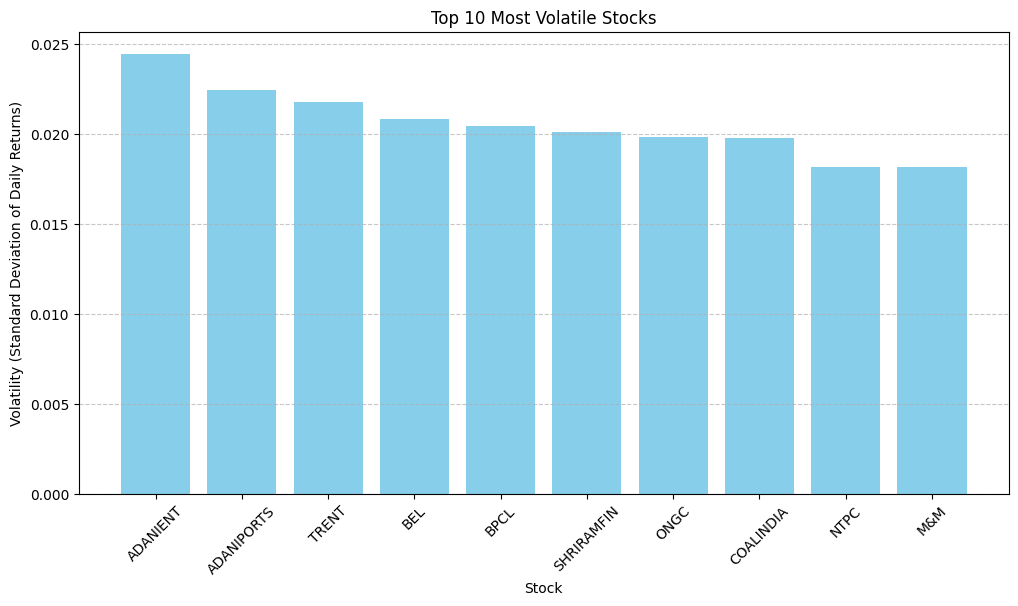

In [9]:
"""
1. Volatility Analysis:
Objective: 
Visualize the volatility of each stock over the past year by calculating the standard deviation of daily returns.
Reason: Volatility gives insight into how much the price fluctuates, which is valuable for risk assessment. Higher volatility often indicates more risk, while lower volatility indicates a more stable stock.

Visualization:
Top 10 Most Volatile Stocks: A bar chart with the stock ticker on the x-axis and volatility (standard deviation) on the y-axis.

"""

# Calculate daily returns
Nifty50_df["daily_return"] = (Nifty50_df["close"] - Nifty50_df["open"]) / Nifty50_df["open"]

# Compute standard deviation of daily returns for each stock (volatility measure) quantifies how much the values deviate from the mean
volatility_df = Nifty50_df.groupby("Ticker")["daily_return"].std().reset_index()
volatility_df.columns = ["Ticker", "Volatility"] # Rename the column to be  clear that the computed values represent volatility.
# print(volatility_df)

# Select the top 10 most volatile stocks
top_volatile_stocks = volatility_df.nlargest(10, "Volatility")

# Plot volatility bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_volatile_stocks["Ticker"], top_volatile_stocks["Volatility"], color="skyblue")
plt.xlabel("Stock")
plt.ylabel("Volatility (Standard Deviation of Daily Returns)")
plt.title("Top 10 Most Volatile Stocks")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


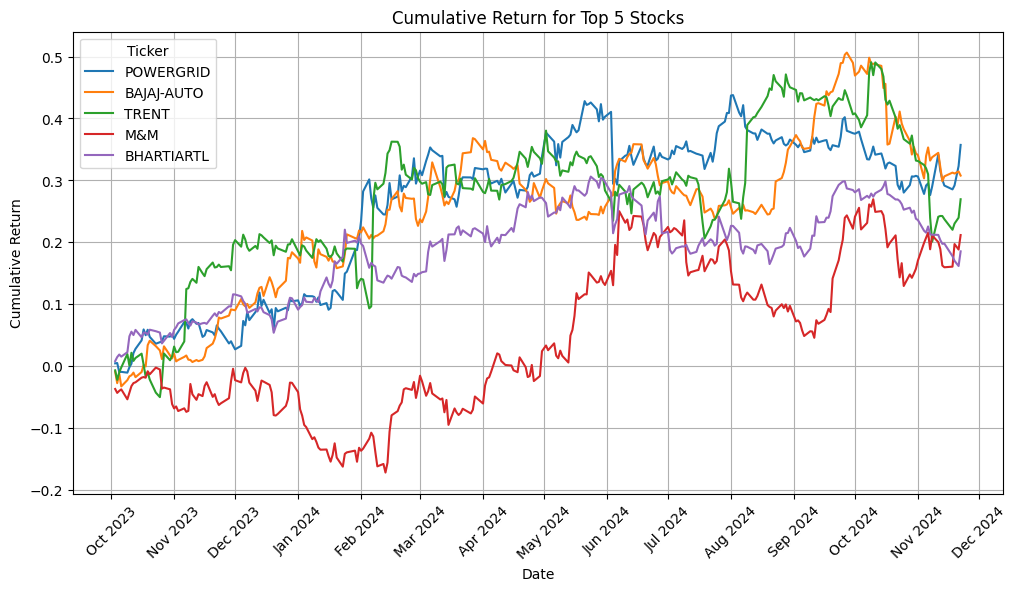

In [10]:
"""
2. Cumulative Return Over Time:
Objective: Show the cumulative return of each stock from the beginning of the year to the end.
Reason: The cumulative return is an important metric to visualize overall performance and growth over time. This helps users compare how different stocks performed relative to each other.

Metrics:
For each stock, calculate the cumulative return by applying a running total of daily returns.
Plot a line chart for the top 5 performing stocks (based on cumulative return) over the course of the year.
Visualization:
Cumulative Return for Top 5 Performing Stocks: A line chart displaying cumulative returns for each stock over the year (increasing trend indicates positive performance).

"""
import matplotlib.dates as mdates

# Calculate Cumulative Return Over Time tracking long-term performance trends 

Nifty50_df["cumulative_return"] = Nifty50_df.groupby("Ticker")["daily_return"].cumsum()
# print(Nifty50_df)

#Select Top 5 Performing Stocks (Highest Cumulative Return at Year-End)
top_cumulative_stocks = Nifty50_df.groupby("Ticker")["cumulative_return"].last().nlargest(5).index #.last() picks the latest cumulative return value for each stock (ensures selecting the final return for the period)
filtered_df = Nifty50_df[Nifty50_df["Ticker"].isin(top_cumulative_stocks)]
# print(top_cumulative_stocks)
# print(filtered_df.head())

# **Plot Cumulative Return Line Chart**
plt.figure(figsize=(12, 6))
for stock in top_cumulative_stocks:
    stock_data = filtered_df[filtered_df["Ticker"] == stock]
    plt.plot(stock_data["date"], stock_data["cumulative_return"], label=stock)  # Add label for legend

plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Return for Top 5 Stocks")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))  # Format x-axis to show Month & Year (e.g., "Jan 2024")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Adjust tick intervals to avoid overcrowding

plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Ticker", loc="best")  
plt.show()


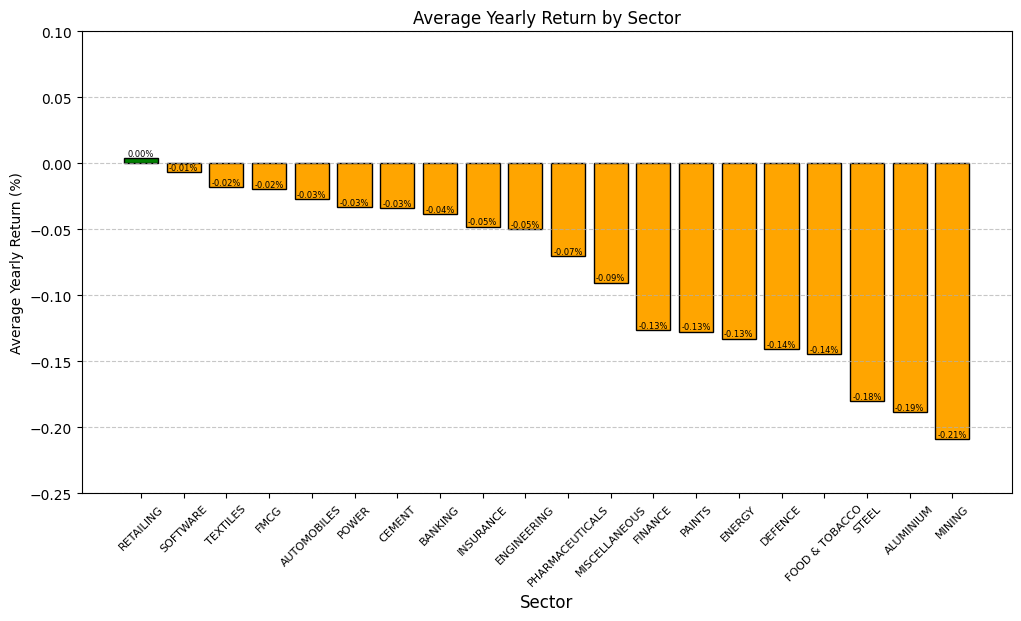

In [11]:
"""
3. Sector-wise Performance:
Objective: Provide a breakdown of stock performance by sector (sector data shared as csv).
Reason: Investors and analysts often look at sector performance to gauge market sentiment in specific industries (e.g., IT, Financials, Energy, etc.).
Metrics:
Classify each stock by its sector (this can be done by adding a separate dataset or manually mapping sectors to stocks).
Calculate the average yearly return for each sector.
Plot a bar chart showing the average performance for each sector.
Visualization:
Average Yearly Return by Sector: A bar chart where each bar represents a sector and its height indicates the average yearly return for stocks within that sector.

"""

# Load sector classification dataset
sector_df = pd.read_csv(r"C:\Users\v-dhramaraj\Desktop\Python\Projects\Assignment2_StockAnalysis\Assignment2_StockAnalysis\Sector_data.csv")  # Ensure the file contains columns ["Ticker", "Sector"]
# sector_df["Ticker"] = sector_df["Symbol"].str.split(":").str[-1].str.strip()
sector_df["Ticker"] = sector_df["Symbol"].str.split(":").str[-1].str.strip().str.replace(" ", "").str.upper()

# Merge sector_df to Nifty50 data 
Nifty50_AllData_df["Ticker"] = Nifty50_AllData_df["Ticker"].str.replace(" ", "").str.upper()
Nifty50_Sector_df = Nifty50_AllData_df.merge(sector_df[["Ticker", "sector"]], on="Ticker", how="left") # Left join to classify stocks by sector
Nifty50_Sector_df["sector"] = Nifty50_Sector_df["sector"].fillna("MISCELLANEOUS") # Replacing Nan values as MISCELLANEOUS 


# Compute yearly return for each stock
Nifty50_Sector_df["yearly_return"] = ((Nifty50_Sector_df["close"] - Nifty50_Sector_df["open"]) / Nifty50_Sector_df["open"]) * 100

# Group stocks by sector and compute the average yearly return
sector_performance = Nifty50_Sector_df.groupby("sector")["yearly_return"].mean().reset_index()

# Sort sectors by performance for better visualization
sector_performance = sector_performance.sort_values(by="yearly_return", ascending=False)

# Plot sector-wise performance with conditional coloring
colors = ["green" if value > 0 else "orange" for value in sector_performance["yearly_return"]] # Assign colors based on yearly return
plt.figure(figsize=(12, 6))
plt.bar(sector_performance["sector"], sector_performance["yearly_return"], color=colors, edgecolor="black")

plt.xlabel("Sector",fontsize=12)
plt.ylabel("Average Yearly Return (%)")
plt.ylim(-0.25, 0.10)
plt.title("Average Yearly Return by Sector")
plt.xticks(rotation=45, fontsize=8)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add labels to bars for clarity
for index, value in enumerate(sector_performance["yearly_return"]):
    plt.text(index, value, f"{value:.2f}%", ha="center", va="bottom", fontsize=6)

plt.show()


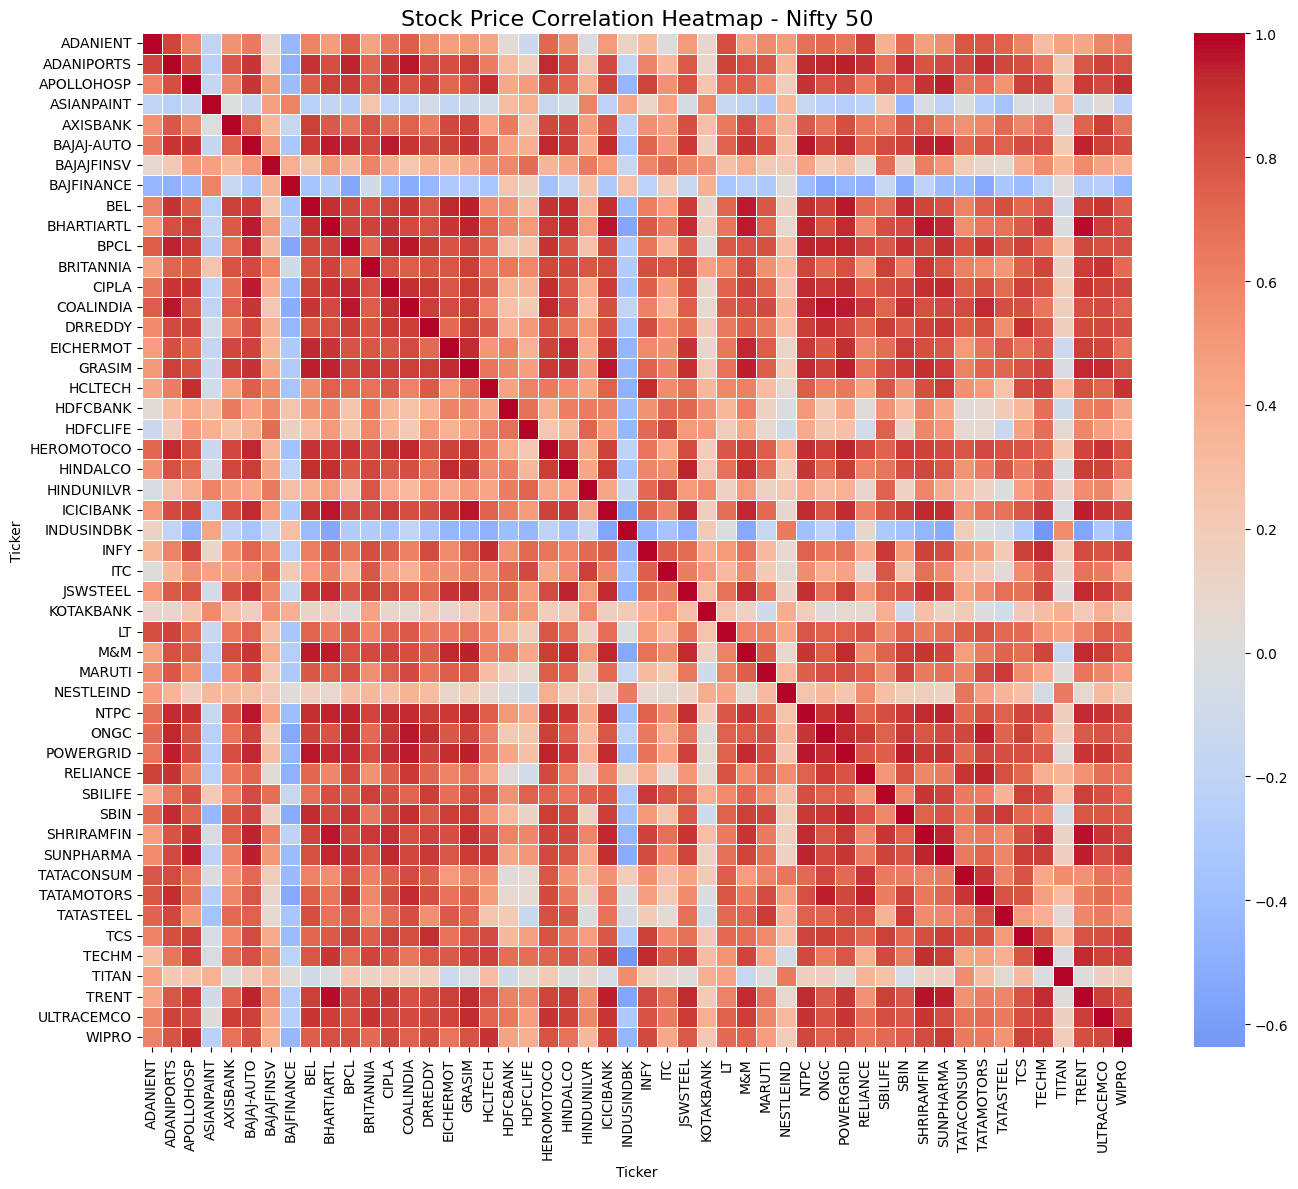

In [13]:
"""
4. Stock Price Correlation:
Objective: Visualize the correlation between the stock prices of different companies.
Reason: This analysis is valuable to understand if certain stocks tend to move in tandem (e.g., correlated with market trends or sector performance).
Metrics:
Calculate the correlation coefficient between the closing percentage of different stocks. For this, use the pandas.DataFrame.corr() method.
Create a correlation matrix to identify how stocks are related to each other.
Plot a heatmap of the correlation matrix to visualize these relationships.
Visualization:
Stock Price Correlation Heatmap: A heatmap to show the correlation between the closing prices of various stocks. Darker colors represent higher correlations.
"""
import seaborn as sns

# Select only relevant stock columns (assuming each column represents a stock's closing price)
stock_prices = Nifty50_AllData_df.pivot_table(index="date", columns="Ticker", values="close")
# print(stock_prices)

# Compute correlation matrix
correlation_matrix = stock_prices.corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Stock Price Correlation Heatmap - Nifty 50", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\v-dhramaraj\AppData\Local\Temp\ipykernel_16124\4267613452.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='monthly_return', y='Ticker', data=top_gainers, ax=axes[i, 0], palette="Greens_r")
C:\Users\v-dhramaraj\AppData\Local\Temp\ipykernel_16124\4267613452.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='monthly_return', y='Ticker', data=top_losers, ax=axes[i, 1], palette="Reds_r")
C:\Users\v-dhramaraj\AppData\Local\Temp\ipykernel_16124\4267613452.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='monthly_return', 

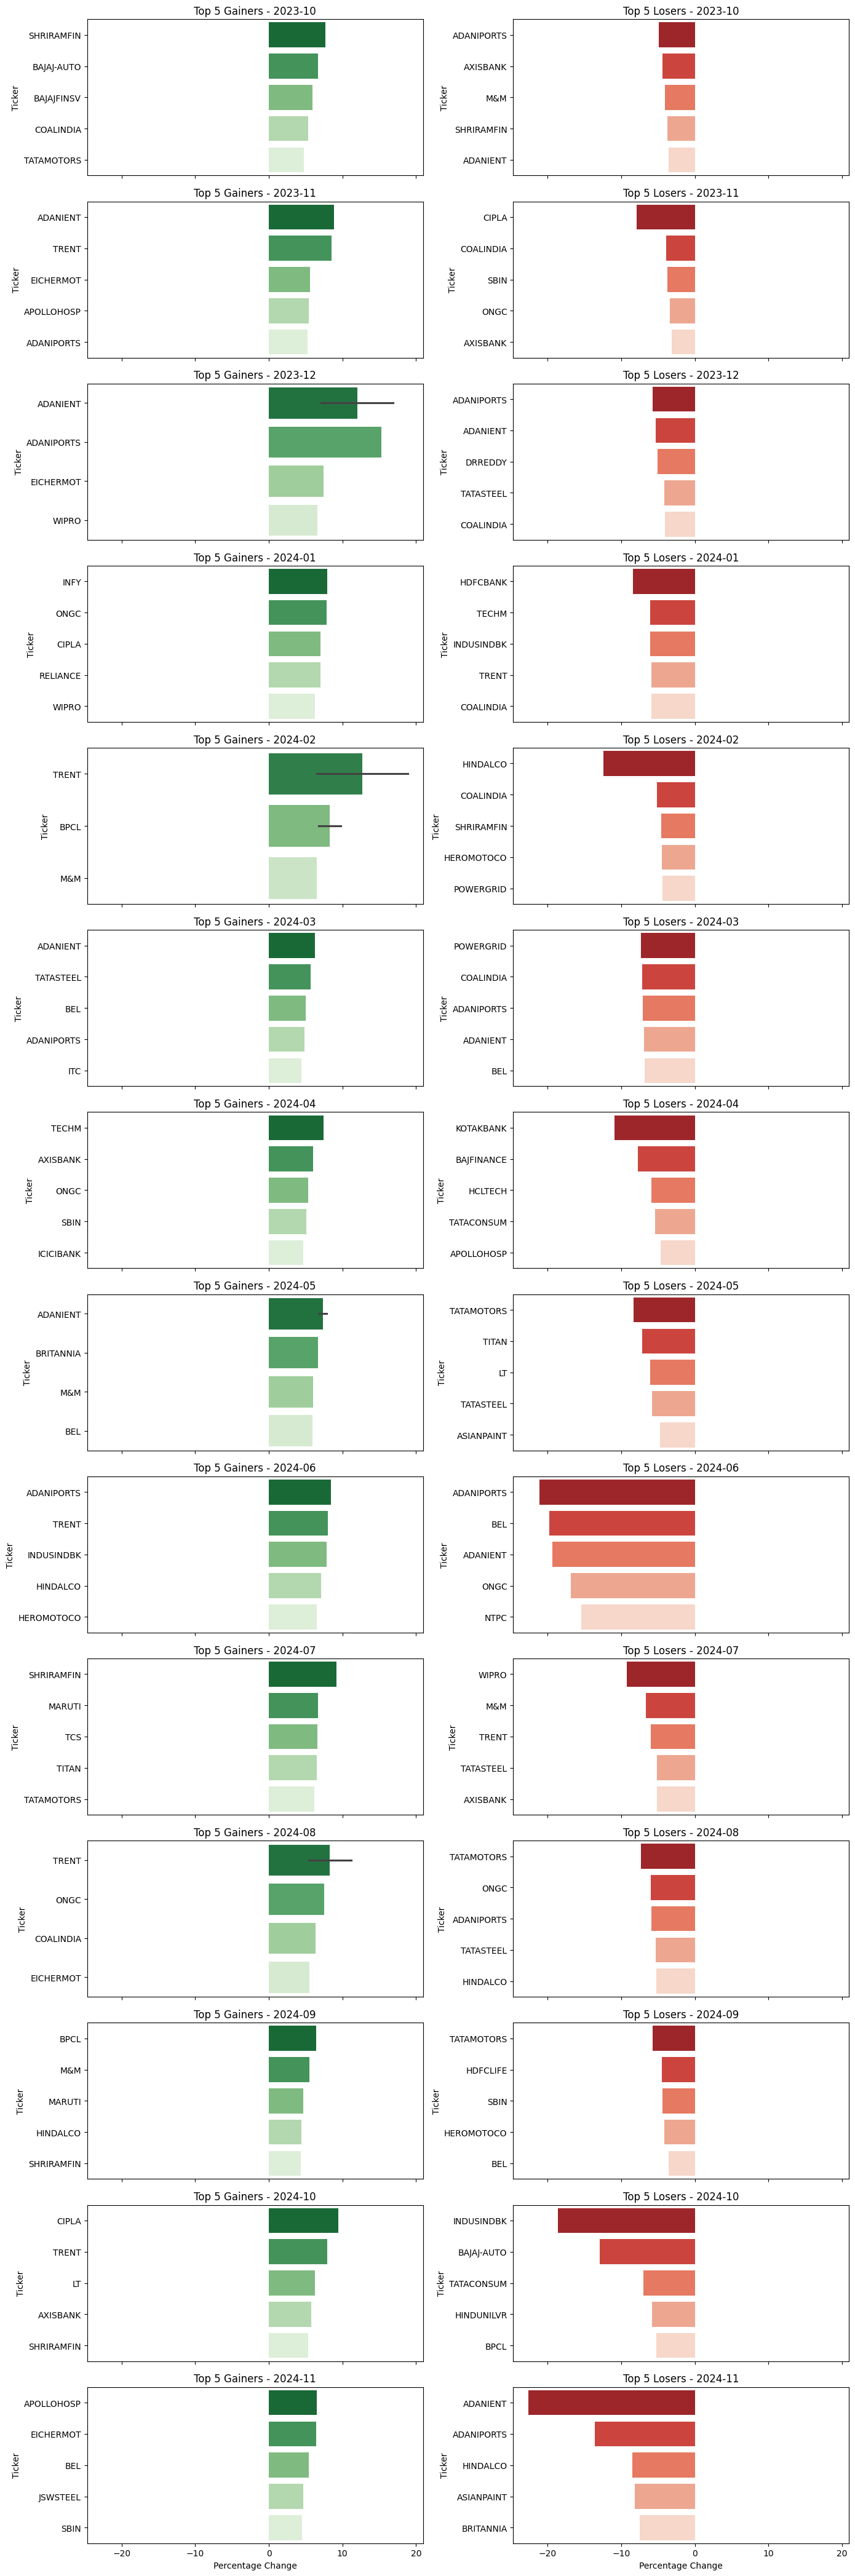

In [14]:
"""
5. Top 5 Gainers and Losers (Month-wise):
Objective: Provide monthly breakdowns of the top-performing and worst-performing stocks.
Reason: This analysis will allow users to observe more granular trends and understand which stocks are gaining or losing momentum on a monthly basis.
Metrics:
Group the stock data by month and calculate the monthly return for each stock.
For each month, identify the top 5 gainers and top 5 losers based on percentage change.
Create a dashboard-style visualization with 5 charts showing top gainers and losers for each month (12 months total).
Visualization:
Top 5 Gainers and Losers by Month: Create a set of 12 bar charts for each month showing the top 5 gainers and losers based on percentage return.

"""
Nifty50_Corr_df = Nifty50_AllData_df.copy()

Nifty50_Corr_df['date'] = pd.to_datetime(Nifty50_Corr_df['date']) # Convert date column to datetime format

Nifty50_Corr_df['YearMonth'] = Nifty50_Corr_df['date'].dt.to_period('M') # Month is extracted correctly

# Calculate Monthly Percentage Returns
Nifty50_Corr_df['monthly_return'] = Nifty50_Corr_df.groupby(['Ticker', 'YearMonth'])['close'].pct_change() * 100

# Drop NA values created due to pct_change()
Nifty50_Corr_df.dropna(subset=['monthly_return'], inplace=True)
months = sorted(Nifty50_Corr_df['YearMonth'].unique())  # Sort months chronologically and get unique months for visualization

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=len(months), ncols=2, figsize=(14, len(months) * 3), sharex=True)

# Loop through each month and add subplots
for i, month in enumerate(months):
    # Filter data for the month
    monthly_data = Nifty50_Corr_df[Nifty50_Corr_df['YearMonth'] == month]

    # Identify top 5 gainers and losers
    top_gainers = monthly_data.nlargest(5, 'monthly_return')
    top_losers = monthly_data.nsmallest(5, 'monthly_return')

    # Plot Gainers
    sns.barplot(x='monthly_return', y='Ticker', data=top_gainers, ax=axes[i, 0], palette="Greens_r")
    axes[i, 0].set_title(f'Top 5 Gainers - {month}')
    axes[i, 0].set_xlabel("Percentage Change")

    # Plot Losers
    sns.barplot(x='monthly_return', y='Ticker', data=top_losers, ax=axes[i, 1], palette="Reds_r")
    axes[i, 1].set_title(f'Top 5 Losers - {month}')
    axes[i, 1].set_xlabel("Percentage Change")

# Adjust layout for better readability
plt.tight_layout()
plt.show()


[Period('2023-10', 'M'), Period('2023-11', 'M'), Period('2023-12', 'M'), Period('2024-01', 'M'), Period('2024-02', 'M'), Period('2024-03', 'M'), Period('2024-04', 'M'), Period('2024-05', 'M'), Period('2024-06', 'M'), Period('2024-07', 'M'), Period('2024-08', 'M'), Period('2024-09', 'M'), Period('2024-10', 'M'), Period('2024-11', 'M')]
